In [141]:
import pandas as pd
import numpy as np
import requests 
import os
import csv
import json as jsn
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
from matplotlib import pyplot as plt

In [58]:
food_df = pd.read_csv('Resources/narrowed.csv')

Plan of action:
~Finish README
~Figure out how you want the data to look, what are you comparing, how do you get there
~Pull those data points together as variables
~Chart variables
~Run regression analysis
~Summarize your findings
~Can you API in national Diabetes rates as an overview of the country?

In [59]:
food_df.head()

,TRACT_NAME,County,"Hospitalization_Census_Tract_Rate_per_100,000","Hospitlization_State_Rate_per_100,000",Adult_Pop_Over_18,Census_Tract_Estimate,Pop_Total,Pop_Density/Sq_Mile,Percent_Poverty,Median_Household_Income,Poverty_Mean_Household_Income,Per_Capita_Income,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,Low_Income_Tract
0,"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,1267.78,2994,10.0,3471,3.4,9.7,49483.0,61677.0,29749,1,1,0,0,0,1,1
1,"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,1267.78,2800,5.0,3656,6.4,14.5,59154.0,82512.0,32362,0,0,0,0,0,1,0
2,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.00,1267.78,97,1.6,97,0.4,38.1,43882.0,41385.0,27278,0,0,0,0,0,1,0
3,"Census Tract 9632, Yuma County, Colorado",YUMA,1390.98,1267.78,4381,8.0,5467,5.3,13.4,44315.0,53229.0,24196,1,1,0,0,0,1,1
4,"Census Tract 24.01, Larimer County, Colorado",LARIMER,529.77,1267.78,1190,8.0,1310,3.3,10.2,61111.0,83656.0,39123,1,1,1,1,0,1,1


In [60]:
food_df.dtypes

TRACT_NAME                                        object
County                                            object
Hospitalization_Census_Tract_Rate_per_100,000    float64
Hospitlization_State_Rate_per_100,000            float64
Adult_Pop_Over_18                                  int64
Census_Tract_Estimate                            float64
Pop_Total                                          int64
Pop_Density/Sq_Mile                              float64
Percent_Poverty                                  float64
Median_Household_Income                          float64
Poverty_Mean_Household_Income                    float64
Per_Capita_Income                                  int64
LILATracts_1And10                                  int64
LILATracts_halfAnd10                               int64
LILATracts_1And20                                  int64
LILATracts_Vehicle                                 int64
Urban                                              int64
Rural                          

In [131]:
colorado_tracts = food_df['TRACT_NAME'].count()
colorado_tracts

1228

In [108]:

colorado_tracts = food_df['TRACT_NAME'].count()
print(f'There are {colorado_tracts} census tracts in the state of Colorado')
print('~'*40)
lila1_10 = food_df[food_df['LILATracts_1And10']==1]
lila_count = lila1_10['County'].count()
lila_rate = lila1_10['Census_Tract_Estimate'].mean()
print(f'Of those {colorado_tracts} census tracts, {lila_count} are designated LILA 1 and 10.')
print(f'LILA 1 & 10 census tracts have a {round(lila_rate,2)} average diabetes diagnosis percentage')
print('~'*40)

lilahalf_10 = food_df[food_df['LILATracts_halfAnd10']==1]
half_count = lilahalf_10['County'].count()
half10_rate = lilahalf_10['Census_Tract_Estimate'].mean()
print(f'Of those {colorado_tracts} census tracts, {half_count} are designated LILA Half and 10.')
print(f'LILA Half & 10 census tracts have a {round(half10_rate,2)} average diabetes diagnosis percentage')
print('~'*40)

lila1_20 = food_df[food_df['LILATracts_1And20']==1]
twenty_count = lila1_20['County'].count()
twenty_rate = lila1_20['Census_Tract_Estimate'].mean()
print(f'Of those {colorado_tracts} census tracts, {twenty_count} are designated LILA 1 and 20')
print(f'LILA 1 & 20 census tracts have a {round(twenty_rate,2)} average diabetes diagnosis percentage')
print('~'*40)

lila_none = food_df[(food_df['LILATracts_1And10']==0)&(food_df['LILATracts_halfAnd10']==0)&(food_df['LILATracts_1And20']==0)]
none_count = lila_none['County'].count()
none_rate = lila_none['Census_Tract_Estimate'].mean()
print(f'Of those {colorado_tracts} census tracts, {none_count} do not contain a LILA designation')
print(f'Census Tracts without LILA designation have a {round(none_rate,2)} average diabetes diagnosis percentage')
print('~'*40)


There are 1228 census tracts in the state of Colorado
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 185 are designated LILA 1 and 10.
LILA 1 & 10 census tracts have a 8.54 average diabetes diagnosis percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 395 are designated LILA Half and 10.
LILA Half & 10 census tracts have a 7.84 average diabetes diagnosis percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 161 are designated LILA 1 and 20
LILA 1 & 20 census tracts have a 8.24 average diabetes diagnosis percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 833 do not contain a LILA designation
Census Tracts without LILA designation have a 6.63 average diabetes diagnosis percentage
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


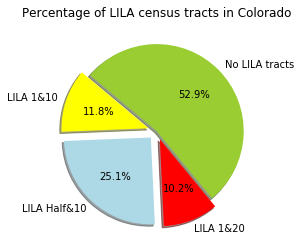

In [99]:
tracts = ['LILA 1&10','LILA Half&10','LILA 1&20','No LILA tracts']
tract_count = [lila_count,half_count,twenty_count,none_count]
colors = ['yellow','lightblue','red','yellowgreen']
explode = [0.1,0.1,0.1,0]
plt.pie(tract_count, explode=explode, labels=tracts, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percentage of LILA census tracts in Colorado')
plt.savefig('Charts/TractsPie.png')

In [112]:
pop1_10 = lila1_10['Pop_Total'].sum()
print(f'There are {pop1_10} people living in LILA 1 and 10 tracts in Colorado')
pophalf_10 = lilahalf_10['Pop_Total'].sum()
print(f'There are {pophalf_10} people living in LILA half and 10 tracts in Colorado')
pop1_20 = lila1_20['Pop_Total'].sum()
print(f'There are {pop1_20} people living in LILA 1 and 20 tracts in Colorado')
pop_none = lila_none['Pop_Total'].sum()
print(f'There are {pop_none} people living in non-LILA designated tracts in Colorado')

There are 795560 people living in LILA 1 and 10 tracts in Colorado
There are 1694377 people living in LILA half and 10 tracts in Colorado
There are 725779 people living in LILA 1 and 20 tracts in Colorado
There are 3701428 people living in non-LILA designated tracts in Colorado


In [125]:
#mean=narrowed_diab_urban[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').mean()['Hospitalization_Census_Tract_Rate_per_100,000']
counties = food_df['County'].unique()
county_1and10=food_df[['County', 'LILATracts_1And10']].groupby('County').sum()['LILATracts_1And10']
county_halfand10 = food_df[['County','LILATracts_halfAnd10']].groupby('County').sum()['LILATracts_halfAnd10']
county_1and20= food_df[['County','LILATracts_1And20']].groupby('County').sum()['LILATracts_1And20']
county_1and10

County
ADAMS         16
ALAMOSA        3
ARAPAHOE      13
ARCHULETA      0
BACA           1
              ..
SUMMIT         0
TELLER         0
WASHINGTON     1
WELD           7
YUMA           2
Name: LILATracts_1And10, Length: 64, dtype: int64

The correlation between both factors is -0.33


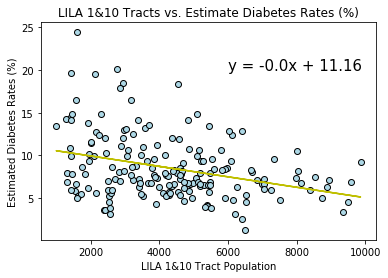

In [148]:
#LILA 1&10 scatter plot
x_value = lila1_10['Pop_Total']
y_value = lila1_10['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value, marker="o", facecolors="lightblue", edgecolors="black")
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(x_value, regress_values, 'y-')
plt.title("LILA 1&10 Tracts vs. Estimate Diabetes Rates (%)")
plt.xlabel('LILA 1&10 Tract Population')
plt.ylabel("Estimated Diabetes Rates (%)")
correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILA10scatter.png')
plt.show()

The correlation between both factors is -0.28


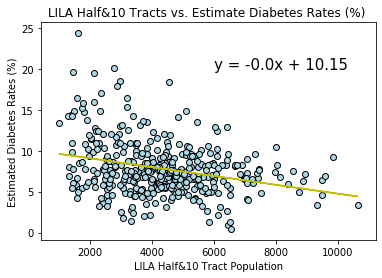

In [149]:
#lilahalf_10 scatter plot
lilahalf_pop = lilahalf_10['Pop_Total']
lilahalf_rate = lilahalf_10['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lilahalf_pop, lilahalf_rate)
regress_values = lilahalf_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lilahalf_pop, regress_values, 'y-')
plt.scatter(lilahalf_pop,lilahalf_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('LILA Half&10 Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('LILA Half&10 Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lilahalf_pop, lilahalf_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILAhalfscatter.png')
plt.show()

The correlation between both factors is -0.3


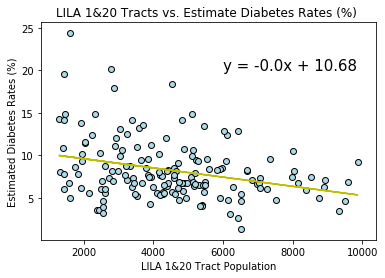

In [150]:
#lila1_20 scatter plot 
lila20_pop = lila1_20['Pop_Total']
lila20_rate = lila1_20['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lila20_pop, lila20_rate)
regress_values = lila20_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lila20_pop, regress_values, 'y-')
plt.scatter(lila20_pop,lila20_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('LILA 1&20 Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('LILA 1&20 Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lila20_pop, lila20_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILA20scatter.png')
plt.show()

The correlation between both factors is -0.09


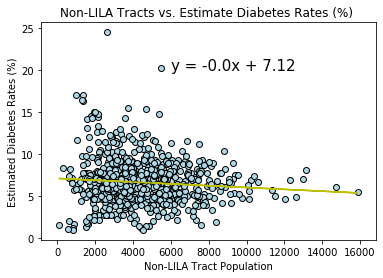

In [151]:
#lila_none scatter plot 
lilanone_pop = lila_none['Pop_Total']
lilanone_rate = lila_none['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lilanone_pop, lilanone_rate)
regress_values = lilanone_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lilanone_pop, regress_values, 'y-')
plt.scatter(lilanone_pop,lilanone_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('Non-LILA Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('Non-LILA Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lilanone_pop, lilanone_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILANonescatter.png')
plt.show()